# Task 3

In [1]:
import torch
from torchvision import transforms
from dataloaders import load_cifar10
from trainer import Trainer, compute_loss_and_accuracy
from plot_utils import create_plots, create_comparison_plots

## Hyperparams

In [2]:
epochs = 10
batch_size = 64
learning_rate = 0.15
early_stop_count = 4

# Model S

## Data

Thinking about adding data augmentation as only change here, in addition to lowering kernel size to 3x3

In [3]:
# Conditional image transformation
p = 0.5
mean = (0.5, 0.5, 0.5)
std = (.25, .25, .25)
rot_degrees = [-10,10]

# Found some transforms suggested by docs, will be randomly added and concated with base data
# https://pytorch.org/vision/main/transforms.html
x_transforms = [transforms.ColorJitter(),
                transforms.RandomCrop((32, 32)),
                transforms.RandomHorizontalFlip(p),
                transforms.RandomRotation(rot_degrees)
                ]
transform = transforms.Compose([
                    transforms.ToTensor(),
                    transforms.Normalize(mean, std),
                    transforms.RandomApply(x_transforms, p)
                ])
dataloaders = load_cifar10(batch_size, transform)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


## Model

In [4]:
from models import ModelS
model = ModelS(image_channels=3, num_classes=10, conv_kernel_size = 5)

## Training

In [5]:
trainer = Trainer(
    batch_size,
    learning_rate,
    early_stop_count,
    epochs,
    model,
    dataloaders
)
trainer.train()

ModelS(
  (feature_extractor): Sequential(
    (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(128, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (10): ReLU()
    (11): Conv2d(256, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (12): ReLU()
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1024, out_features=64, bias=True)
    (2): ReLU()
    (3

## Plotting
Plot training loss and validation accuracy

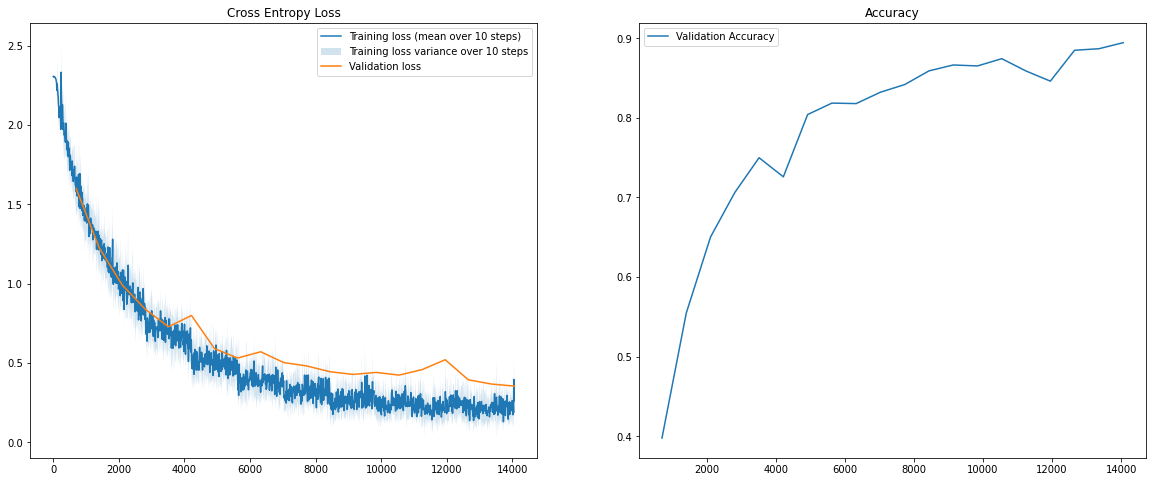

In [6]:
create_plots(trainer, "task3_modelS_5")

## Accuracy
Calculate accuracy over training, test and validation

In [7]:
_, final_train_accuracy = compute_loss_and_accuracy(trainer.dataloader_train, trainer.model, trainer.loss_criterion)
_, final_val_accuracy = compute_loss_and_accuracy(trainer.dataloader_val, trainer.model, trainer.loss_criterion)
_, final_test_accuracy = compute_loss_and_accuracy(trainer.dataloader_test, trainer.model, trainer.loss_criterion)

print(f"Train Accuracy: {final_train_accuracy:.3f}, Validation Accuracy: {final_val_accuracy:.3f}, Test Accuracy: {final_test_accuracy:.3f}")

Train Accuracy: 0.948, Validation Accuracy: 0.891, Test Accuracy: 0.761


# Model S with kernel size 3

## Data

In [8]:
# Keep the data augmentation from last model
# dataloaders = load_cifar10(batch_size)

## Model

In [9]:
from models import ModelS
model = ModelS(image_channels=3, num_classes=10, conv_kernel_size = 3)

## Training

In [10]:
trainer = Trainer(
    batch_size,
    learning_rate,
    early_stop_count,
    epochs,
    model,
    dataloaders
)
trainer.train()

ModelS(
  (feature_extractor): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU()
    (11): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU()
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1024, out_features=64, bias=True)
    (2): ReLU()
    (3

## Plotting
Plot training loss and validation accuracy

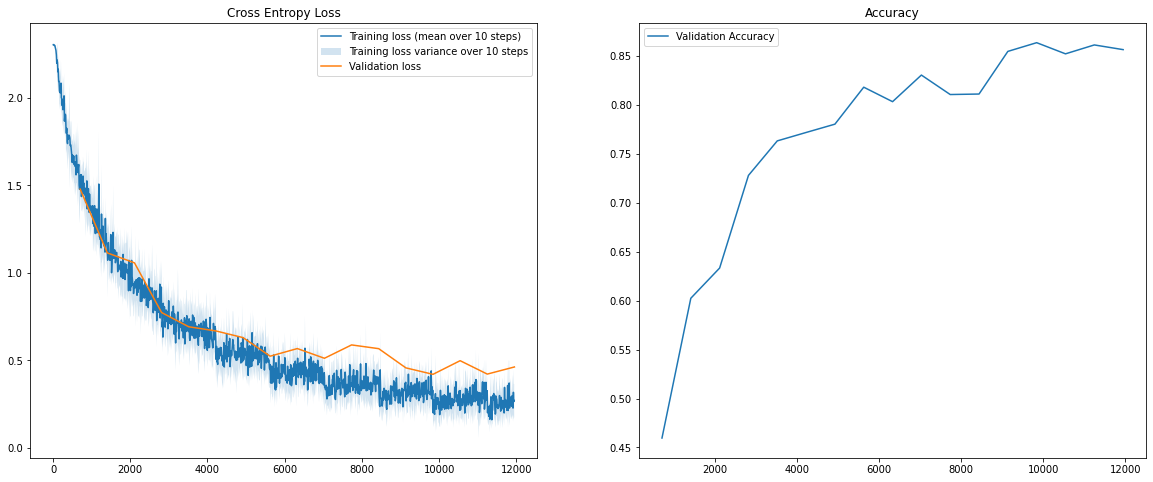

In [11]:
create_plots(trainer, "task3_modelS_3")

## Accuracy
Calculate accuracy over training, test and validation

In [12]:
_, final_train_accuracy = compute_loss_and_accuracy(trainer.dataloader_train, trainer.model, trainer.loss_criterion)
_, final_val_accuracy = compute_loss_and_accuracy(trainer.dataloader_val, trainer.model, trainer.loss_criterion)
_, final_test_accuracy = compute_loss_and_accuracy(trainer.dataloader_test, trainer.model, trainer.loss_criterion)

print(f"Train Accuracy: {final_train_accuracy:.3f}, Validation Accuracy: {final_val_accuracy:.3f}, Test Accuracy: {final_test_accuracy:.3f}")

Train Accuracy: 0.918, Validation Accuracy: 0.859, Test Accuracy: 0.767


# Model E

Added batchnorm and adam optim

## Data

In [13]:
# Keep the data augmentation from last model
# dataloaders = load_cifar10(batch_size)

## Model

In [14]:
from models import ModelE    

model = ModelE(image_channels=3, num_classes=10)

## Training

In [15]:
trainer = Trainer(
    batch_size,
    learning_rate,
    early_stop_count,
    epochs,
    model,
    dataloaders
)
trainer.optimizer = torch.optim.Adam(model.parameters())
trainer.train()

ModelE(
  (feature_extractor): Sequential(
    (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (5): ReLU()
    (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (9): ReLU()
    (10): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(128, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (13): ReLU()
    (14): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, tr

## Plotting

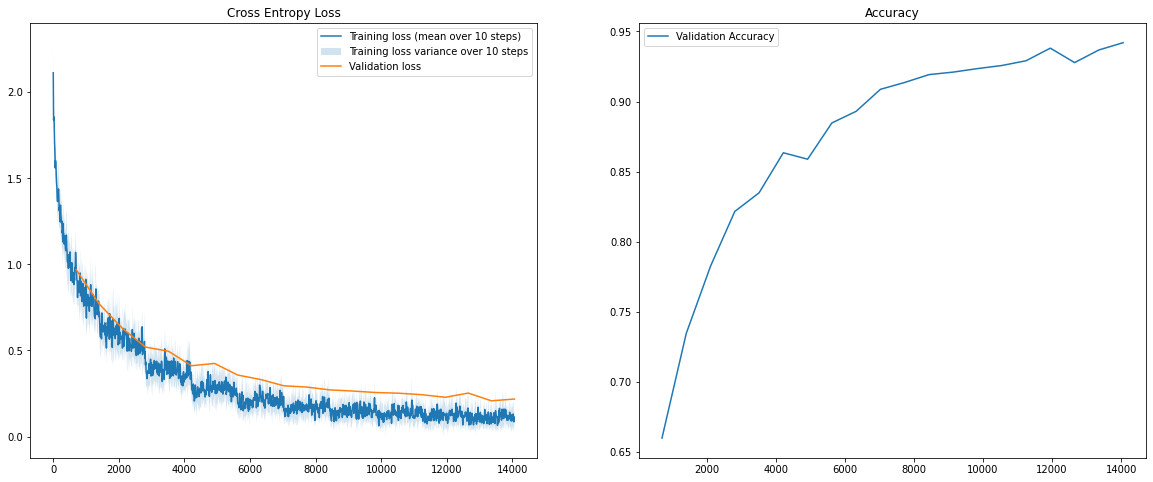

In [16]:
create_plots(trainer, "task3_modelE")

## Accuracy

In [17]:
_, final_train_accuracy = compute_loss_and_accuracy(trainer.dataloader_train, trainer.model, trainer.loss_criterion)
_, final_val_accuracy = compute_loss_and_accuracy(trainer.dataloader_val, trainer.model, trainer.loss_criterion)
_, final_test_accuracy = compute_loss_and_accuracy(trainer.dataloader_test, trainer.model, trainer.loss_criterion)

print(f"Train Accuracy: {final_train_accuracy:.3f}, Validation Accuracy: {final_val_accuracy:.3f}, Test Accuracy: {final_test_accuracy:.3f}")

Train Accuracy: 0.972, Validation Accuracy: 0.937, Test Accuracy: 0.812


## LR = 0.0015

In [18]:
from models import ModelE
model = ModelE(image_channels=3, num_classes=10)

trainer = Trainer(
    batch_size,
    0.0015,
    early_stop_count,
    epochs,
    model,
    dataloaders
)
trainer.optimizer = torch.optim.Adam(model.parameters())
trainer.train()

ModelE(
  (feature_extractor): Sequential(
    (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (5): ReLU()
    (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (9): ReLU()
    (10): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(128, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (13): ReLU()
    (14): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, tr

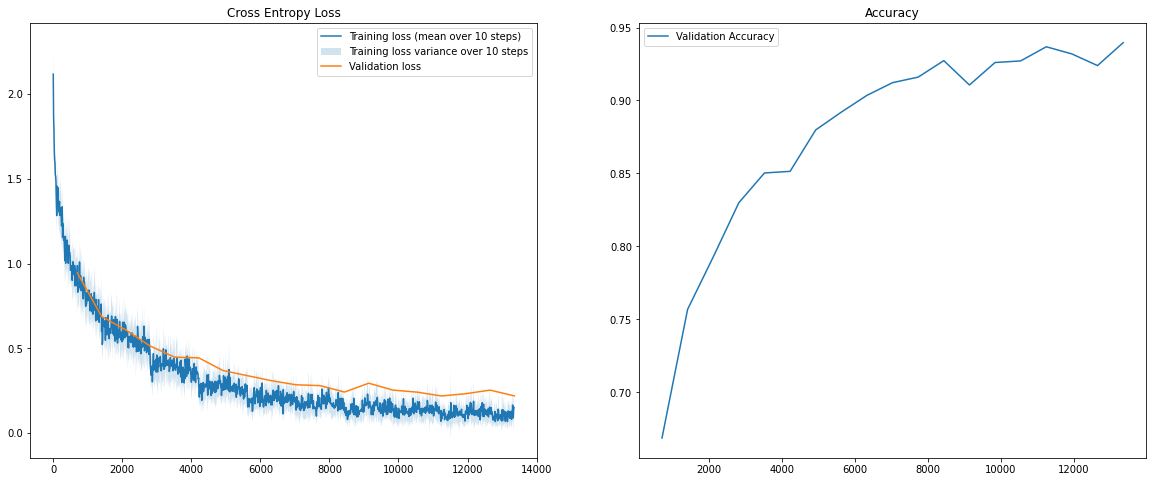

In [19]:
create_plots(trainer, "task3_modelE_0_0015")

In [20]:
final_train_loss, final_train_accuracy = compute_loss_and_accuracy(trainer.dataloader_train, trainer.model, trainer.loss_criterion)
final_val_loss, final_val_accuracy = compute_loss_and_accuracy(trainer.dataloader_val, trainer.model, trainer.loss_criterion)
final_test_loss, final_test_accuracy = compute_loss_and_accuracy(trainer.dataloader_test, trainer.model, trainer.loss_criterion)

print(f"Train Accuracy: {final_train_accuracy:.3f}, Validation Accuracy: {final_val_accuracy:.3f}, Test Accuracy: {final_test_accuracy:.3f}")
print(f"Train Loss: {final_train_loss:.3f}, Validation Loss: {final_val_loss:.3f}, Test Loss: {final_test_loss:.3f}")

Train Accuracy: 0.970, Validation Accuracy: 0.927, Test Accuracy: 0.803
Train Loss: 0.097, Validation Loss: 0.246, Test Loss: 0.759


## W/o data augmentation

In [24]:
dataloaders = load_cifar10(batch_size)

from models import ModelE
model = ModelE(image_channels=3, num_classes=10)

trainer_no_data_aug = Trainer(
    batch_size,
    0.0015,
    early_stop_count,
    epochs,
    model,
    dataloaders
)
trainer_no_data_aug.optimizer = torch.optim.Adam(model.parameters())
trainer_no_data_aug.train()

Files already downloaded and verified
Files already downloaded and verified
ModelE(
  (feature_extractor): Sequential(
    (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (5): ReLU()
    (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (9): ReLU()
    (10): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(128, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (13)

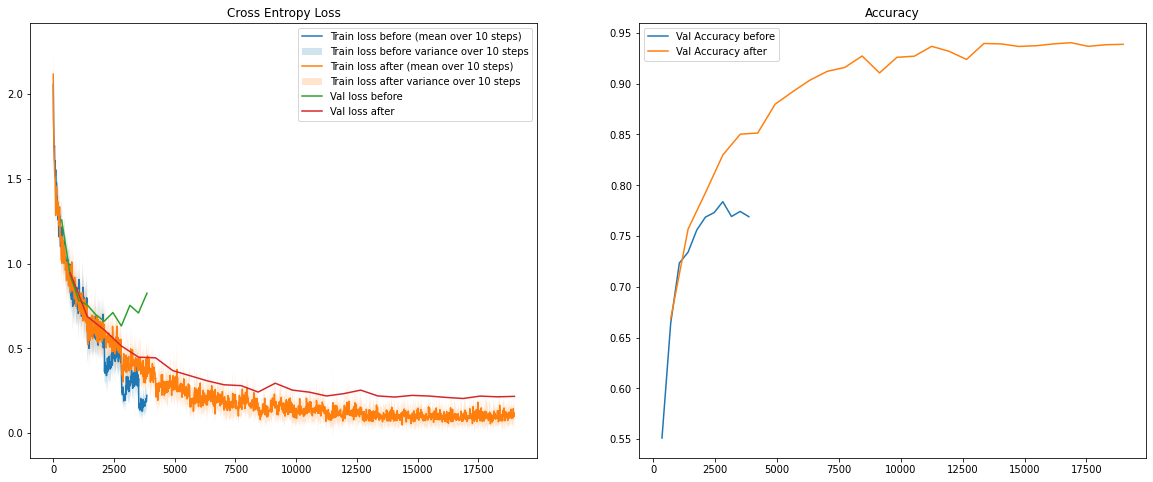

In [25]:
create_comparison_plots(trainer_no_data_aug, trainer, "task3_modelE_data_aug")

In [27]:
final_train_loss, final_train_accuracy = compute_loss_and_accuracy(trainer_no_data_aug.dataloader_train, trainer_no_data_aug.model, trainer_no_data_aug.loss_criterion)
final_val_loss, final_val_accuracy = compute_loss_and_accuracy(trainer_no_data_aug.dataloader_val, trainer_no_data_aug.model, trainer_no_data_aug.loss_criterion)
final_test_loss, final_test_accuracy = compute_loss_and_accuracy(trainer_no_data_aug.dataloader_test, trainer_no_data_aug.model, trainer_no_data_aug.loss_criterion)

print(f"Train Accuracy: {final_train_accuracy:.3f}, Validation Accuracy: {final_val_accuracy:.3f}, Test Accuracy: {final_test_accuracy:.3f}")
print(f"Train Loss: {final_train_loss:.3f}, Validation Loss: {final_val_loss:.3f}, Test Loss: {final_test_loss:.3f}")

Train Accuracy: 0.952, Validation Accuracy: 0.767, Test Accuracy: 0.768
Train Loss: 0.145, Validation Loss: 0.825, Test Loss: 0.839
